Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 150ms/step - accuracy: 0.3457 - loss: 1.7662 - val_accuracy: 0.5000 - val_loss: 1.3970
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 133ms/step - accuracy: 0.4821 - loss: 1.4344 - val_accuracy: 0.5405 - val_loss: 1.2850
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 154ms/step - accuracy: 0.5428 - loss: 1.2887 - val_accuracy: 0.6009 - val_loss: 1.1203
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.5809 - loss: 1.1944 - val_accuracy: 0.6288 - val_loss: 1.0618
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.6098 - loss: 1.1119 - val_accuracy: 0.6194 - val_loss: 1.0656
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 120ms/step - accuracy: 0.6367 - loss: 1.0401 - val_accuracy: 0.6348 - val_loss: 1.0158
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 126ms/step - accuracy: 0.6568 - loss: 0.9917 - val_accuracy: 0.6683 - val_loss: 0.9422
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 119ms/step - accuracy: 0.6724 - loss: 

Enter an index (0 to 9999) for test image:  32


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


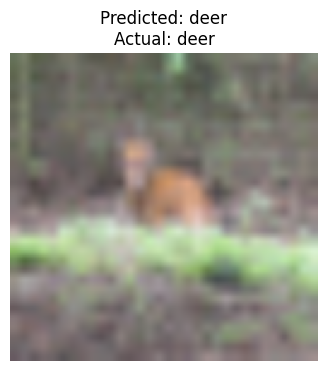

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build the CNN model with explicit Input layer
model = tf.keras.Sequential([
    Input(shape=(32, 32, 3)),                 # Explicit input layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Get user input for test image index
index = int(input("Enter an index (0 to 9999) for test image: "))
if index < 0 or index >= len(x_test):
    print("Invalid index. Using index 0 by default.")
    index = 0

test_image = x_test[index]
true_label = np.argmax(y_test[index])
prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)

# Plot the test image and prediction
plt.figure(figsize=(4, 4))
resized_image = tf.image.resize(test_image, [128, 128])
plt.imshow(resized_image.numpy())
plt.axis('off')
plt.title(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[true_label]}")
plt.show()
#32
